## Bakgrundsbeskrivning
Telcco AB är ett fiktivt företag som har en utmaning med kundbortfall. Man vill identifiera de kunder som riskerar att
falla bort. Dessa kunder kan genom riktade erbjudanden lockas att stanna kvar.

### Uppgiften
Hitta en lösning som bygger på observationer som intäkter från kunden, antal produkter, och andra data om kunden.
Man vill hitta kunder som riskerar att falla bort.

### Förklaring av vad för typ av AI är bäst lämpad för denna data.

För denna data så skall vi göra någon sorts klassificering för att utreda om kunderna har en benägenhet att lämna företaget eller inte. Det är med andra ord en maskinlärningsmetod som är inriktad mot klassificering och eftersom vi har både indata och utdata så använder vi oss av övervakat lärande (Supervised).
Några exempel är Linjär regression, Random Forest eller Neural Networks.

# Inläsning och tolkning av datan.

Börjar med att läsa in de paket som jag vet att jag kommer att använda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

Läser in vårt dataset i en dataframe och skriver ut de första raderna.

In [2]:
df = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Kontrollerar vad datan består av.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Slutsaster från datatyperna
Noterar att:
SeniorCitizen är int64. - Detta verkar skilja sig från den andra datan och värt att utforska.
TotalCharges är object. - Detta verkar inte stämma då jag tolkar detta som en summa.

Utöver detta så tycker jag inte att något direkt sticker ut med datatyperna.

Kontrollerar om vi har några saknade värden

In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Alla celler i datan har värden.

# Städning och uppstyrning av datan

Eftersom 'customerID' inte bidrar till datans värde utan enbart är en unik identifierare så väljer jag att droppa denna data för att komma ifrån att modellerna som kommer användas senare lägger något värde i denna kolumn.

In [5]:
print(df['customerID'].is_unique)
df = df.drop('customerID', axis=1)
df.head(3).T

True


,0,1,2
gender,Female,Male,Male
SeniorCitizen,0,0,0
Partner,Yes,No,No
Dependents,No,No,No
tenure,1,34,2
PhoneService,No,Yes,Yes
MultipleLines,No phone service,No,No
InternetService,DSL,DSL,DSL
OnlineSecurity,No,Yes,Yes
OnlineBackup,Yes,No,Yes


Döper om kolumner för att få dem mer enhetliga.

In [6]:
df = df.rename(columns={'gender':'Gender', 'tenure':'TenureMonths'})

Kontrollerar vad för värden 'SeniorCitizen' består utav eftersom den i datan var definerad som en 'int64'.

In [7]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

'SeniorCitizen' värden verkar vara binära och tolkar därmed datan som ok.
Gör antagandet att man är 'SeniorCitizen' = 1 eller så är man inte det 'SeniorCitizen' = 0.

Eftersom 'TotalCharges' består av 6531 unika värden så är den svår att läsa av manuellt för att kunna dra någon slutsats om varför datatypen är object.

In [8]:
TotCharUniq = df['TotalCharges'].nunique()
print(f'Antal unika poster: {TotCharUniq}', end='\n\n')
print(df['TotalCharges'].head(3))

Antal unika poster: 6531

0     29.85
1    1889.5
2    108.15
Name: TotalCharges, dtype: object


Datan verkar bara innehålla numeriska värde så kontrollerar om jag kan gör om datatypen till numerisk.

In [9]:
# pd.to_numeric(df['TotalCharges'])

Cellen ovan är utkommenterad då cells resultat mynnar ut i ett fel (ValueError: Unable to parse string " "). Detta säger mig att datan inte enbart är numerisk utan innehåller " " och det krävs lite undersökning av datan.

Sorterar ut de rader som innehåller mellanslag genom att forcera datan till numerisk och ta bort värdena som innehåller andra värden än nummer och sätta dem till NULL sen filtrerar jag min ursprungliga dataframe på dessa värden.

In [10]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[df['TenureMonths'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Det verkar vara elva poster som har mellanslag i datan. Dessa värden kan vara intressanta då de är de kunderna som inte haft en måndasbetlaning ännu. Väljer att sätta dessa posters TotalCharge till 0.

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.loc[df['TotalCharges'] == 0]

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


# Datavisualisering innan redigering av unika värden

Förbereder datan för visualisering

In [13]:
df['Churn'] = df['Churn'].replace({'Yes': 'Churned', 'No': 'Retained'})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Senior', 0: 'Not senior'})

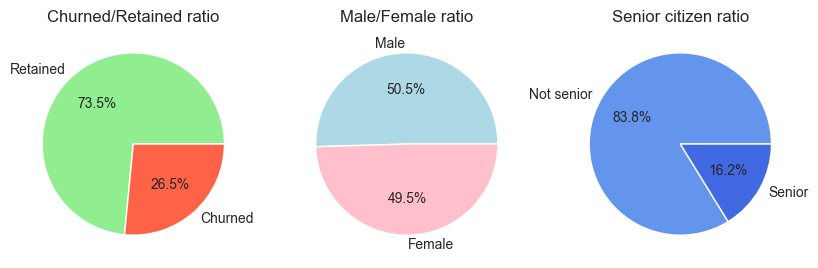

In [14]:
colors = ['lightgreen', 'tomato']
colors1 = ['lightblue', 'pink']
colors2 = ['cornflowerblue', 'royalblue']

gender_labels = df['Gender'].value_counts().index
churn_labels = df['Churn'].value_counts().index
senior_labels = df['SeniorCitizen'].value_counts().index

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].pie(df['Churn'].value_counts(), labels=churn_labels, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Churned/Retained ratio')

axs[1].pie(df['Gender'].value_counts(), labels=gender_labels, autopct='%1.1f%%', colors=colors1)
axs[1].set_title('Male/Female ratio')

axs[2].pie(df['SeniorCitizen'].value_counts(), labels=senior_labels, autopct='%1.1f%%', colors=colors2)
axs[2].set_title('Senior citizen ratio')

plt.show()

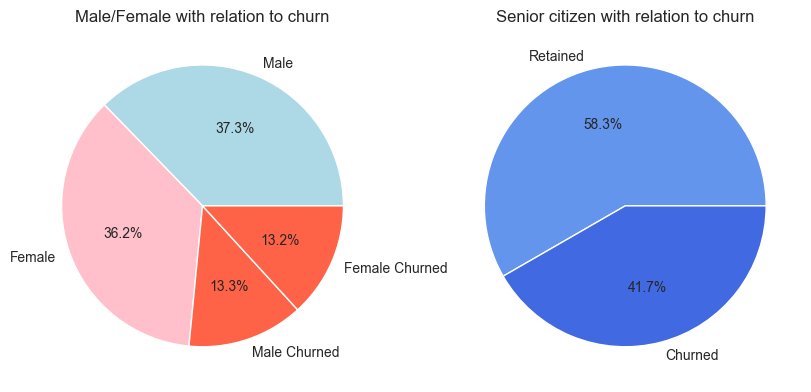

In [15]:
gender_churn_labels = np.concatenate((gender_labels, [f'{label} Churned' for label in gender_labels]))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(df[['Gender', 'Churn']].value_counts(), labels=gender_churn_labels, autopct='%1.1f%%', colors=['lightblue', 'pink','tomato' ,'tomato'])
axs[0].set_title('Male/Female with relation to churn')

axs[1].pie(df[df['SeniorCitizen'] == 'Senior']['Churn'].value_counts(), labels=churn_labels, autopct='%1.1f%%', colors=['cornflowerblue', 'royalblue','tomato' ,'tomato'])
axs[1].set_title('Senior citizen with relation to churn')

plt.show()

Fördelningen mellan män och kvinnor som hoppar av är jämnt fördelad.

Det är intressant att på den visserligen ganska lilla gruppen Seniorer så är det ändå en stor andel som hoppar av.

In [ ]:
fig = plt.hist(x=df[['Churn','Contract']].value_counts(), density=True)

# Redigering av unika värden

Kollar antalen unika värden i varje kolumn.

In [ ]:
df.nunique()

In [ ]:
# Skapar en lista för att analysera kolumnerna som har två värden för att se om jag kan ersätta dem med binära tal.
col=['Gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for i in col:
    print(i,df[i].unique())

In [ ]:
# Granska kolumnerna som har tre värden för att se om jag kan göra om dessa till binära.
col=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
for i in col:
    print(i,df[i].unique())

Tänker att jag borde kunna ändra alla värden som har 'No internet service' och 'No phone service' till 'No' då jag reda får denna infon genom 'InternetService' och 'PhoneService' kolumnerna.

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace(['No phone service'], 'No')

df['OnlineSecurity'] = df['OnlineSecurity'].replace(['No internet service'], 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace(['No internet service'], 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace(['No internet service'], 'No')
df['TechSupport'] = df['TechSupport'].replace(['No internet service'], 'No')
df['StreamingTV'] = df['StreamingTV'].replace(['No internet service'], 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace(['No internet service'], 'No')


col=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']
for i in col:
    print(i,df[i].unique())

Skapar en variabel med de kolumner som kan göras om till binära tal.

In [ ]:
binary_col=['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in binary_col:
    print(i,df[i].unique())

# Visualisering innan maskinlärning

# Förbereder datan för maskinlärning